# Analysis of the input data

The task involves using accelerometer data from football players' leg movements, recorded at a 50Hz frequency, to recreate a football game. The data, organized as nested lists of dictionaries, includes the norm of 3-dimensional acceleration for each player's gait during a session. The start and end of player movement, defined as the stance period, are identified by the moments when the player's foot is on the ground with zero speed. Each gait is associated with a specific action (e.g., shot, pass, dribble), labeled based on player acceleration. Notable action labels cover various player activities, such as running, walking, tackling, and resting. The goal is to analyze these sequential data to understand player movements and actions throughout the game, considering the inherent variability in gait sizes and their sequential nature. 
So movement time = number of samples/ 50.

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_json("../Data/match_1.json")
data2 = pd.read_json("../Data/match_2.json")
df = pd.concat([data,data2])
df.head()

,label,norm
0,walk,"[23.177037336396975, 23.361525285249378, 21.53..."
1,walk,"[20.998214383911275, 19.182798059840767, 18.27..."
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554..."
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787..."
4,rest,"[22.069263037713093, 19.672270483203395, 19.88..."


In [13]:
result = df.groupby('label')['norm'].describe()


pd.set_option('display.max_colwidth', None)
result

,count,unique,top,freq
label,,,,
cross,4,4,"[57.65439590486032, 111.02478206918458, 60.18640843064797, 27.28563768118375, 15.911210139823154, 14.854958764764202, 35.578346434562626, 42.41447239265959, 34.31068745608605, 38.82107112448392, 41.67067833830596, 36.596068879903925, 22.47374969316013, 18.455856531773488, 14.096478773600465, 9.951527955020753, 26.655187399357573, 30.77273494809267, 35.845314494987456, 49.33214321442781, 58.03079524994578, 51.14455886389652, 27.157211932991466, 11.389789233953849, 17.90833365280849, 11.221763242727109, 11.267878063606087, 12.935532888944609, 8.662742029242265, 12.933408242981075, 21.61465140720281, 34.69240749174805, 21.529835629021456, 26.7947030515935, 37.330242561750126, 71.11742689195033, 40.58472979213343, 66.36122020604992, 93.6627557230069, 312.592872203065, 76.0307200763687, 159.65299686228406]",1
dribble,78,78,"[28.985802058905858, 26.17263539170306, 21.23439862372217, 28.58230997204789, 36.11346431386493, 37.91742505855903, 28.304985439303262, 40.223771942999335, 56.54271068255033, 70.32094790008561, 86.87997129581028, 69.70599003090138, 29.160374730496805, 38.76156683360288, 44.7692440931213, 52.58684658858851, 39.93004446379592, 24.08162855784596, 45.03992010598937, 95.87079931332636, 63.43115163063357, 50.99281718573731, 58.09358961871146, 65.62482937355091, 61.58354889913833, 53.73502225056036, 33.08280007623976, 70.91927007695212, 58.91949983350072, 37.08311946534526, 31.58199076459985, 36.671415685505735, 22.74797201582345, 18.801539638560023, 19.63521484878898, 22.236450822499577, 19.20419017063769, 37.067076052005504, 43.92288582013822, 53.52257874268841, 43.68333513778102, 127.94086323559924, 146.60851794215452, 223.13796292194485, 89.0582462610821, 36.85010186782863, 41.97463413496223, 53.21033637829027, 44.6629039770822, 67.89478702986652]",1
no action,2,2,"[104.42423889328715, 87.63989343949717, 128.5261849145872, 85.28252761835475, 114.84767339056773, 112.2454499058008, 75.9111979077955, 190.31826717483398, 33.54670351236696, 102.45193075189341, 157.4588553203466, 35.93073011241273, 230.65506620695248, 241.47756946878408, 55.10018529426276, 243.29430015393393, 98.11886721361198, 119.15252911619854, 17.7021950435132, 106.8757730615181, 25.191091466582904, 64.95464057943082, 21.34018862466842, 27.936581347277734, 24.894478636160866, 19.6668617791697, 24.923106439791056, 20.98624822229277, 17.829089223784226, 20.216565100889593, 19.614810550716726, 18.014577404563546, 20.9358821418966, 19.001863870390064, 18.785138161519633, 19.646764608489203, 19.51806473449375, 21.184927281892637, 19.030311046139317, 17.34018483824069, 18.028128954045318, 18.028128954045318, 20.413394692024728, 21.69020015669664, 19.434082149293243, 19.05658635191472, 25.239686532629197, 28.74449817833215, 31.31666618256678, 33.78711647584022, 35.84869732711052, 39.36737045524457, 39.61719177408071, 26.59259739313053, 5.185454850823557, 11.670035008248846, 18.912553493597827, 18.460707151414756, 16.73242761778636, 20.283994788721337, 20.092291683150787, 22.53002150675981, 23.633616203655624, 24.82466803400155, 28.047588275063973, 32.44069874529961, 30.832218214777058, 37.799666483711945, 40.44147811646176, 58.55734784145512, 40.10747960016241, 29.05536754648517, 15.24726322538234, 23.250437274998788, 28.202764702177678, 23.47672128261256]",1
pass,32,32,"[29.653541236594563, 95.4314774282106, 58.07460662274247, 40.20383511145945, 61.00670609661371, 44.558339699799255, 27.58423916367548, 31.01795020729021, 41.257615564375, 36.64926150651294, 32.415965122408856, 20.47623951364224, 22.29098654341592, 27.78423303937945, 27.167953986174943, 31.371421859002467, 85.91485079019492, 16.64088232524178, 63.83447068196512, 153.9117164031058, 34.6891810738136, 117.02824743042636, 174.64985082127046]",1
rest,35,35,"[22.069263037713093, 19.672270483203395, 19.882150193270725, 21.10126586129179, 20.07808385379729, 20.936662261812213, 20.492236864556716, 19.416971815009315, 19.99516359690314, 21.206229421050185, 1

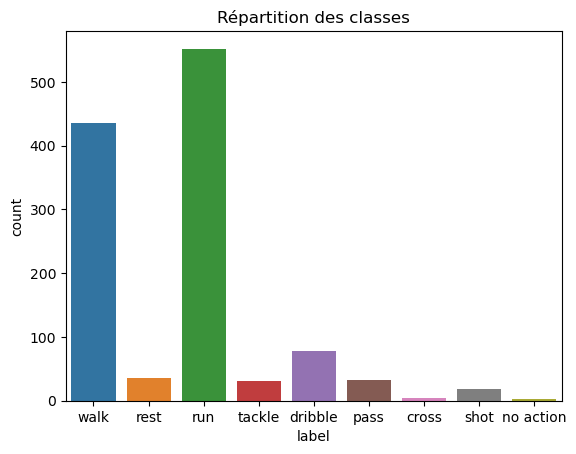

In [14]:
sns.countplot(x='label', data=df)
plt.title('Répartition des classes')
plt.show()

The count indicates the number of instances for each action. For the 'run' and 'walk' labels, with sample counts of 552 and 435 respectively, their prevalence seems logical in the context of a football match. Specifically, the higher count for 'run' and the slightly lower count for 'walk' align with expectations in terms of player movements. It is therefore normal to have more of these actions than shots, dribbles, passes, or crosses, for example. As illustrated by our histogram, it becomes evident that there is a pronounced dominance of 'walk' and 'run' movements compared to the other actions. The visual representation highlights the prevalence of these particular actions, providing a clear insight into the distribution of player movements in our dataset.

However, the action that raises questions for me is the number of passes, which seems relatively low compared to statistics for the number of passes in an 11-a-side match. This leads me to think that there may be either an anomaly, matches with reduced time, or 5-a-side matches on a smaller field. This could also explain the low number of crosses. The number of shots seems low, but not unreasonable. If these are matches with reduced time, it could explain it. The number of dribbles seems reasonable, as does the number of tackles. 
"No action" seems to represent actions that could not be identified, potentially due to outliers or aberrant values preventing movement classification.

Regarding the norms, the accelerometer values for the "walk" and "rest" labels appear to share a resemblance, as do "run" and "dribble," which also have approximately similar values. 

We observe a rather significant diversity in labels such as 'walk,' 'run,' or 'dribble.' This is quite positive as it could facilitate the generalization of our model to different matches, players, etc.

In [12]:
# check null values
null_values = df.isnull().any()

# Display total number of null values per column 
print("\nTotal number of null values per column:")
print(df.isnull().sum())



Total number of null values per column:
label    0
norm     0
dtype: int64


The presence of non-null values in the dataset indicates data completeness, suggesting that all observations are filled in.


In [24]:
from tabulate import tabulate

# Calcule la durée de chaque gait en secondes
df['duration'] = df['norm'].apply(lambda x: len(x) / 50)  # 50Hz frequency assumed

# Définit les seuils de durée pour déterminer ce qui est trop court ou trop long
short_threshold = 0.1  # Seuil pour trop court
long_threshold = 3.0  # Seuil pour trop long

# Utilise np.where pour vérifier si la durée est trop courte, trop longue ou dans la plage correcte
df['duration_category'] = np.where(df['duration'] < short_threshold, 'Trop courte', 
                                   np.where(df['duration'] > long_threshold, 'Trop longue', 'Dans la plage correcte'))

# Crée un tableau pour afficher le nombre de gaits trop courts ou trop longs
duration_counts = df['duration_category'].value_counts()


print(tabulate(duration_counts.reset_index(), headers=['Durée', 'Nombre de gaits'], tablefmt='pretty'))



+---+------------------------+-----------------+
|   |         Durée          | Nombre de gaits |
+---+------------------------+-----------------+
| 0 | Dans la plage correcte |      1172       |
| 1 |      Trop longue       |        9        |
| 2 |      Trop courte       |        6        |
+---+------------------------+-----------------+


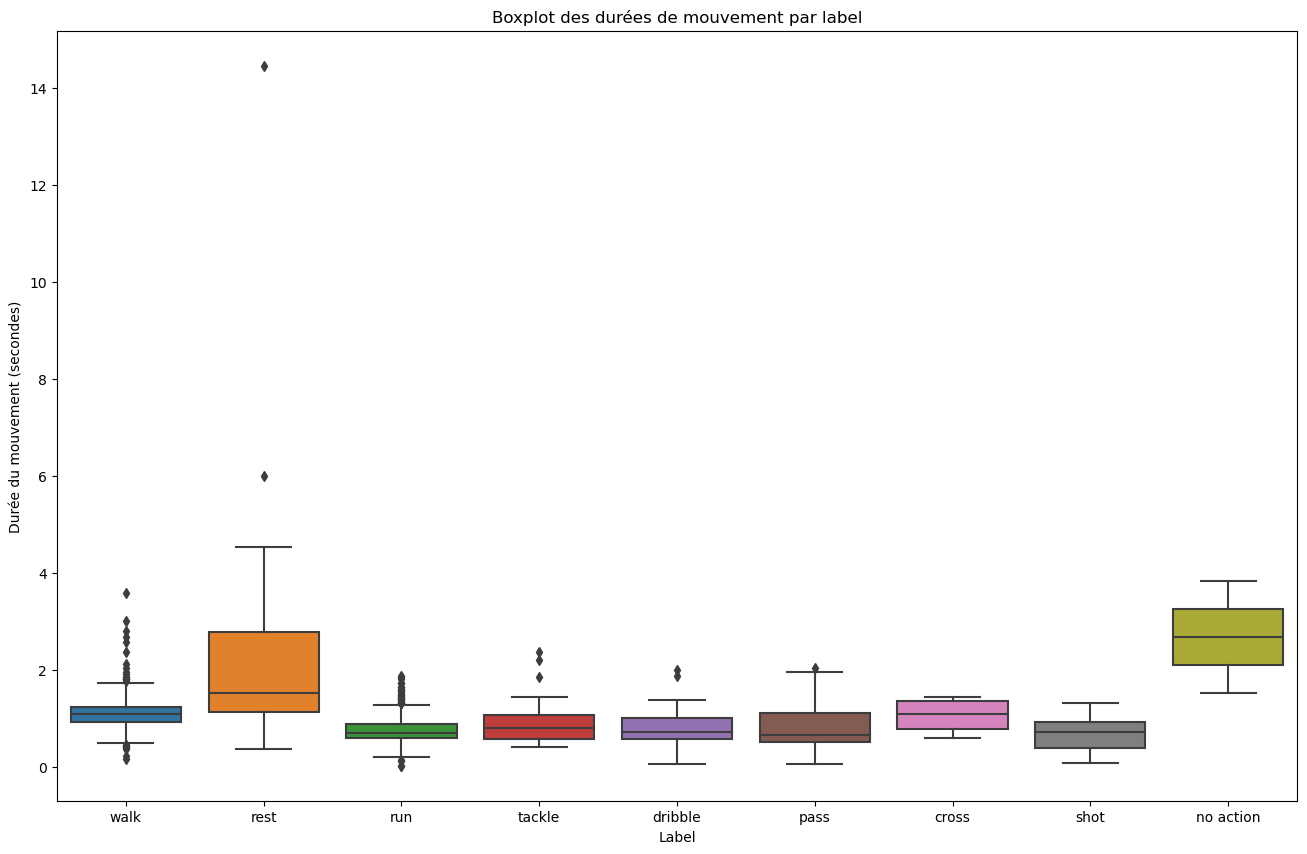

In [25]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='label', y='duration', data=df)


plt.xlabel('Label')
plt.ylabel('Durée du mouvement (secondes)')
plt.title('Boxplot des durées de mouvement par label')


plt.show()

On this boxplot graph, we detect a higher number of outliers for labels such as 'walk' and 'run' due to their greater diversity in the number of movements, while labels with low variability, such as 'cross,' 'shot,' and 'no action,' show no outliers, which makes sense given their low number of samples.

Conversely, labels such as 'tackle,' 'pass,' 'dribble,' and 'rest' have a low number of outliers due to their reduced sample size compared to 'run' and 'walk'.
The correlation between data frequency and the presence of outliers can be explained by the diversified and dynamic nature of the game. It will be essential to consider this variability during the modeling and analysis of the data.

It can also be observed that, on average, approximately all labels have similar movement times, except for 'no action' and 'rest,' which are higher.